In [1]:
import json
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
import tripy
plt.style.use('classic')

In [2]:
loc="C:/Users/kilhe/Downloads/Bronew.json"
file=open(loc,"r")
data=json.loads(file.read())


In [3]:
print(data['features'][0].keys())
print(data['features'][0]['type'])
print(data['features'][0]['id'])


dict_keys(['type', 'id', 'roadWidth', 'towerRadius', 'wallThickness', 'generator', 'version'])
Feature
values


In [4]:
typ=list()
ids=list()
for i in data["features"]:
    typ.append(i["type"])
    ids.append(i["id"])
print(typ)
print(ids)

['Feature', 'Polygon', 'GeometryCollection', 'GeometryCollection', 'GeometryCollection', 'GeometryCollection', 'MultiPolygon', 'MultiPolygon', 'MultiPolygon', 'MultiPolygon', 'MultiPolygon']
['values', 'earth', 'roads', 'walls', 'rivers', 'planks', 'buildings', 'prisms', 'squares', 'greens', 'fields']


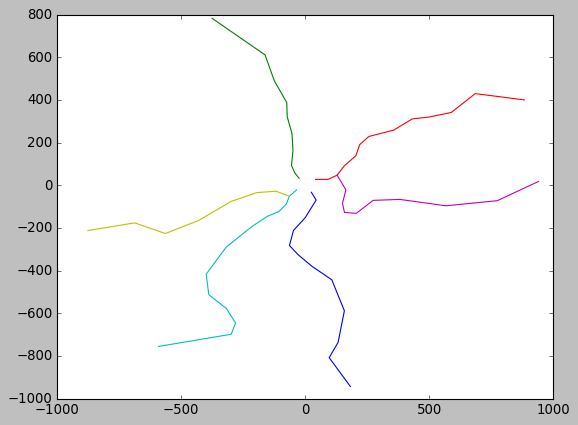

In [5]:
#ROADS
#geometries hold a list of LineStrings
roads=data["features"][2]["geometries"]
for i in range(len(roads)):
    road=roads[i]["coordinates"]
    xr,yr=np.array(road).transpose()
    plt.plot(xr,yr)


In [35]:
#idea: make two lines displaced by width/2 from center
def getRoad(road,width=-1):
    '''
    road: dict where coordinates contain the line of points and width contains a positive number
    width: overrides the desired width of the road
    returns: closed loop
    '''
    if width<0:
        width=road["width"]
    hw=width/2
    line=road["coordinates"]
    lower=list()
    higher=list()
    x0,y0=[0,0]
    skip=True
    for x,y in line:
        if skip:
            x0,y0=x,y
            skip=False
            continue
        n=normalFromSeg([x0,y0],[x,y])
        lower.append( [x-n[0]*hw, y-n[1]*hw] )
        higher.append( [x+n[0]*hw, y+n[1]*hw] )
    
    line=higher+lower[::-1]
    line.append(line[0])
    return np.array(line)
line=getRoad(roads[1],5)

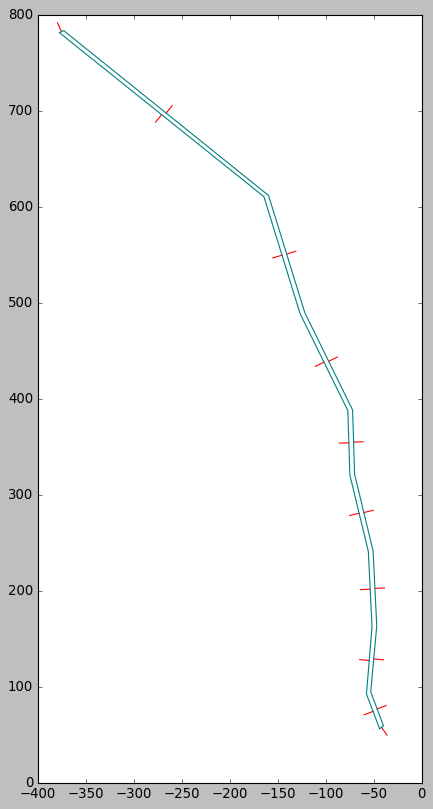

In [36]:
getRoadNormals(line)

In [42]:
getSurface(line,0)

([array([[-43.8805953 ,  56.12337943,   0.        ],
         [-39.7774047 ,  58.98062057,   0.        ],
         [-53.06307561,  94.40423768,   0.        ]]),
  array([[-159.49057614,  611.47933365,    0.        ],
         [-372.92746626,  783.30819165,    0.        ],
         [-377.45653374,  781.18980835,    0.        ]]),
  array([[-159.49057614,  611.47933365,    0.        ],
         [-377.45653374,  781.18980835,    0.        ],
         [-164.35542386,  610.32466635,    0.        ]]),
  array([[-121.8034578 ,  489.52390486,    0.        ],
         [-159.49057614,  611.47933365,    0.        ],
         [-164.35542386,  610.32466635,    0.        ]]),
  array([[-121.8034578 ,  489.52390486,    0.        ],
         [-164.35542386,  610.32466635,    0.        ],
         [-126.6885422 ,  488.45809514,    0.        ]]),
  array([[ -71.97316116,  388.12373051,    0.        ],
         [-121.8034578 ,  489.52390486,    0.        ],
         [-126.6885422 ,  488.45809514,    0.  

C:\tools\miniconda3\lib\site-packages\ipykernel_launcher.py:88: RuntimeWarning: invalid value encountered in double_scalars
C:\tools\miniconda3\lib\site-packages\ipykernel_launcher.py:89: RuntimeWarning: invalid value encountered in double_scalars


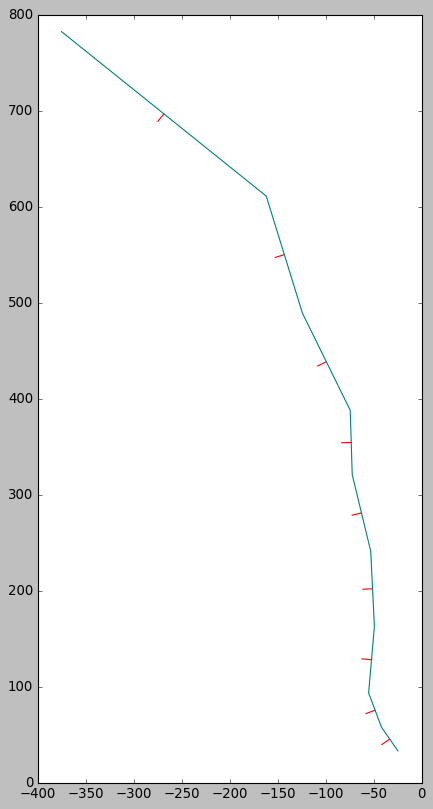

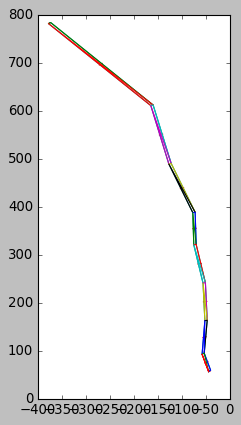

In [49]:
#test: trouver la normale correcte du contour des bâtiments
def normalFromSeg(p0,p1):
    '''
    p1, p2 : points of the segment
    Returns the normal (normalized) of the segment
    if the polygon is written in clockwise order, it's the correct one.
    '''
    dx=p1[0]-p0[0]
    dy=p1[1]-p0[1]
    norm=np.sqrt(dx*dx+dy*dy)
    dx=dx/norm
    dy=dy/norm
    #px=(x1+x0)/2.0
    #py=(y1+y0)/2.0

    #those are inside
    #nx=[px,px-dy]
    #ny=[py,py+dx]
    return [-dy,dx]

def getRoadNormals(building):
    '''
    building: sequence of points representing the clockwise ordered contour of a building [[x1,x2,x3],[y1,y2,y3]] 
    '''
    x,y=np.array(building).transpose()
   # x=np.append(x,[x[0]])
   # y=np.append(y,[y[0]])

    fig,ax=plt.subplots()

    skip=True
    x0=0.0
    y0=0.0
    for x1,y1 in zip(x,y):
        if skip:
            x0=x1
            y0=y1
            skip=False
            continue

        #x0y0 - x1y1 is one segment
        dx=x1-x0
        dy=y1-y0
        norm=np.sqrt(dx*dx+dy*dy)
        dx=dx/norm
        dy=dy/norm
        px=(x1+x0)/2.0
        py=(y1+y0)/2.0

        #those are inside
        nx=[px,px-dy*10]
        ny=[py,py+dx*10]
        
        x0=x1
        y0=y1
        ax.plot(nx,ny,"red")
    F = plt.gcf()
    Size = F.get_size_inches()
    F.set_size_inches(Size[0]*2, Size[1]*2, forward=True)

    ax.set_aspect('equal', 'box')
    ax.plot(x,y,"teal")
    
def getBuildingNormal(building):
    '''
    building: sequence of points representing the clockwise ordered contour of a building [[x1,x2,x3],[y1,y2,y3]] 
    '''
    x,y=np.array(building).transpose()
    x=np.append(x,[x[0]])
    y=np.append(y,[y[0]])

    fig,ax=plt.subplots()

    skip=True
    x0=0.0
    y0=0.0
    for x1,y1 in zip(x,y):
        if skip:
            x0=x1
            y0=y1
            skip=False
            continue

        #x0y0 - x1y1 is one segment
        dx=x1-x0
        dy=y1-y0
        norm=np.sqrt(dx*dx+dy*dy)
        dx=dx/norm
        dy=dy/norm
        px=(x1+x0)/2.0
        py=(y1+y0)/2.0

        #those are inside
        nx=[px,px-dy]
        ny=[py,py+dx]
        
        x0=x1
        y0=y1
        ax.plot(nx,ny,"red")


    ax.set_aspect('equal', 'box')
    ax.plot(x,y,"teal")
    for tri in tripy.earclip(building):
        ax.plot([tri[0][0],tri[1][0],tri[2][0]],[tri[0][1],tri[1][1],tri[2][1]])
getRoadNormals(roads[1]["coordinates"])
getBuildingNormal(line)

In [41]:

def getSurface(contour,height):
    
    surfacetris=tripy.earclip(contour)
    #this above returns something of the form ( ((1,0),(0,1),(0,0)),((...),...),... )
    #this below converts it to array( [ [1,0,height], [0,1,height], [0,0,height] ],[[...],...]... )
    surface = [np.array([np.append(a,[height]),np.append(b,[height]),np.append(c,[height])]) 
               for a,b,c in surfacetris]
    return surface,np.array([[0,0,1]]*len(surface))
    
def getWalls(contour,height):
    triangles=list()
    normals=list() #each triangle has exactly one norm    
    x,y=np.array(contour).transpose()
    x=np.append(x,[x[0]])
    y=np.append(y,[y[0]])
    z=np.array([0]*len(x))#assume ground is 0
    
    x0,y0,z0=[0,0,0]
    skip=True
    for xi,yi,zi in zip(x,y,z):
        if skip:
            x0,y0,z0=[xi,yi,zi]
            skip=False
            continue
        
        tri1 = np.array([[x0,y0,z0],[xi,yi,height],[xi,yi,zi]])
        tri2 = np.array([[x0,y0,z0],[x0,y0,height],[xi,yi,height]])

        n = np.append(normalFromSeg([x0,y0],[xi,yi]),[height/2])
        triangles.append(tri1)
        triangles.append(tri2)
    
        normals.append(n)
        normals.append(n)
        x0,y0,z0=[xi,yi,zi]
    return triangles,normals

def make3DBuilding(building,height):
    '''
    building: sequence of points representing the clockwise ordered contour of a building [[x1,x2,x3],[y1,y2,y3]]
    (the building as we get it from data has one more [] around it so use [0])
    height: desired height of this building
    '''
    
    
    triangles,normals=getWalls(building,height)
    
    roof,nroof=getSurface(building,height)
    
    
    return {"walls":{"triangles": triangles,"normals":normals},"roof":{"triangles":roof,"normals":nroof}}
    
#display(make3DBuilding(buildings[25][0],10))
#display("-------------------------------")
#display(getSurface(fields[5][0],0))

In [ ]:
roof

In [ ]:
tripy.earclip(buildings[5][0])

In [ ]:
height=10
roof,n=getRoof(buildings[5][0],10)
#center: avg(v1,v2,v3)
print(roof)
c=[ np.average(r,0) for r in roof]

print(c)

In [ ]:
roof[0]

In [ ]:
np.average(roof[0],0)